In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

<font color = steel size = 5>Load the data, there should be string lists of data, opening label and win-lose label</font>

In [ ]:
def read_data(file_name):
    
    chess_openings = []
    chess_moves = []
    chess_result =[]
    
    with open(file_name,'r') as f:
        
        lines = f.readlines()
    
        lines = [s.strip() for s in lines]
        
    num_lines = len(lines)

    i = 0
    
    while i < num_lines:
        
        current_line_opening = lines[i]
        
        if 'Result' in current_line_opening :
            chess_result.append(current_line_opening[9:-2])

        if 'Opening' in current_line_opening :
            chess_openings.append(current_line_opening)
        
        if "1. " in current_line_opening :
            if current_line_opening.find(" 6.")!= -1 :
                chess_moves.append(current_line_opening[0:current_line_opening.find(" 6.")])
            else:
                index_0 = current_line_opening.find("0-")
                index_1 = current_line_opening.find("1/2-")
                index_2 = current_line_opening.find("1-")
                if index_0 != -1:
                    chess_moves.append(current_line_opening[0:index_0 -1])
                elif index_1 != -1:
                    chess_moves.append(current_line_opening[0:index_1 -1])
                elif index_2 != -1:
                    chess_moves.append(current_line_opening[0:index_2 -1])
                else:
                    chess_moves.append(current_line_opening)
            
        i += 1
    
    return chess_openings,chess_moves,chess_result

In [ ]:
file_name = 'chess_moves_data.txt'
r,data,win_lose = read_data(file_name)

In [ ]:
print(win_lose[0])

1-0


In [ ]:
opening = []
#For openings
for i in range(0,len(r)):
    o = r[i][10:-2]
    arr =  o.split(" ")
    p_o = '' 
    for item in arr:
    # r[i] = arr[0]+ arr[1]
        if(len(p_o)!=0):
            p_o +=' '
        if(item.find(":")!= -1):
            p_o +=item[:item.find(":")]
            break
        else:
            p_o +=item
    # print(p_o)
    opening.append(p_o)

In [ ]:
for i in range(0,len(opening)):
    s = opening[i]
    if s.find(" #") != -1:
        opening[i] = s[0:s.find(" #")]
    if s.find(",") != -1:
        opening[i] = s.split(",")[0]

In [ ]:
classes = ['Sicilian Defense',"Queen's Pawn Game",'French Defense',"King's Pawn Game",'Scandinavian Defense','Philidor Defense',"Van't Kruijs Opening",'English Opening','Italian Game','Ruy Lopez']

idxes = [i for i in range(len(opening)) if  opening[i] in classes]

test_openings = [opening[i] for i in idxes]
test_win_lose = [win_lose[i] for i in idxes]
test_data = [data[i] for i in idxes]

print(len(data))
print(len(test_data))
print(len(test_win_lose))
print(len(test_openings))


121332
58814
58814
58814


In [ ]:
from collections import Counter
print(Counter(test_openings))
print("\n")
print(Counter(test_win_lose))
print("\n")
print(test_data[0:100])

Counter({'Sicilian Defense': 11803, "Queen's Pawn Game": 8427, 'French Defense': 8160, "King's Pawn Game": 5274, 'Scandinavian Defense': 5207, 'Philidor Defense': 4625, "Van't Kruijs Opening": 3995, 'English Opening': 3942, 'Italian Game': 3923, 'Ruy Lopez': 3458})


Counter({'1-0': 29431, '0-1': 27446, '1/2-1/2': 1937})


['1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6 gxh6', '1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nxg6 hxg6', '1. e4 e6 2. f4 d5 3. e5 c5 4. Nf3 Qb6 5. c3 Nc6', '1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. d3 Bc5 5. c3 O-O', '1. e4 e5 2. c4 Bc5 3. Nf3 d6 4. d3 a6 5. a3 Bg4', '1. e4 e6 2. d4 d5 3. Nc3 Nf6 4. Bg5 Be7 5. Bxf6 Bxf6', '1. e4 e5 2. Nf3 Nc6 3. Bb5 Nge7 4. Nc3 h6 5. Nd5 a6', '1. e4 c5 2. f4 d5 3. exd5 Qxd5 4. Nc3 Qd8 5. Bc4 Bf5', '1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Ne7 5. f4 cxd4', '1. e4 e6 2. d4 b6 3. d5 Bb4+ 4. c3 Bc5 5. b4 Bd6', '1. e4 d5 2. exd5 Qxd5 3. Nc3 Qe5+ 4. Be2 Bg4 5. d4 Qe6', '1. e4 d5 2. exd5 Qxd5 3. Nc3 Qe6+ 4. Qe2 Nf6 5. Nf3 b6', '1. e4 e5 2. Nf3 Qf6

In [ ]:
from collections import Counter
print(Counter(opening))
print("\n")
print(Counter(win_lose))
print("\n")
print(data[0:100])

Counter({'Sicilian Defense': 11803, "Queen's Pawn Game": 8427, 'French Defense': 8160, "King's Pawn Game": 5274, 'Scandinavian Defense': 5207, 'Philidor Defense': 4625, "Van't Kruijs Opening": 3995, 'English Opening': 3942, 'Italian Game': 3923, 'Ruy Lopez': 3458, 'Caro-Kann Defense': 3406, 'Owen Defense': 3290, "Bishop's Opening": 2961, 'Hungarian Opening': 2755, 'Modern Defense': 2560, "Queen's Gambit Declined": 2302, 'Scotch Game': 2043, 'Horwitz Defense': 1953, 'Zukertort Opening': 1708, 'Pirc Defense': 1691, 'Nimzowitsch Defense': 1679, "King's Gambit Accepted": 1640, "Queen's Gambit Accepted": 1494, 'Four Knights Game': 1448, "Queen's Gambit Refused": 1422, 'Indian Game': 1400, 'Nimzo-Larsen Attack': 1343, 'English Defense': 1278, 'Slav Defense': 1261, 'Bird Opening': 1157, 'Alekhine Defense': 1121, 'Vienna Game': 1121, 'Russian Game': 1016, 'Center Game': 984, "Queen's Pawn": 902, "King's Knight Opening": 796, 'Rat Defense': 747, 'Dutch Defense': 739, 'Semi-Slav Defense': 717, '

In [ ]:
import numpy as np
import pandas as pd
opening = pd.DataFrame(test_openings)
win_lose = pd.DataFrame(test_win_lose)
data = pd.DataFrame(test_data)

 
concacted = pd.concat([data,opening,win_lose],axis= 1)
concacted.columns = ['data','opening','win_lose']
concacted = concacted.dropna()


In [ ]:
temp_data = concacted["data"]
cols = [i  for i in range(0,len(temp_data)) if temp_data[i].find("eval") != -1]
concacted = concacted.drop(cols,axis=0,)


In [ ]:
# concacted.to_csv("CNN_concacted.csv")

In [ ]:
# # print(cols)
# print(type(pd.DataFrame(concacted["data"])))
# pd.DataFrame(concacted["opening"]).to_csv("opening.csv", index= None,header=None)
# pd.DataFrame(concacted["win_lose"]).to_csv("win_lose.csv", index= None,header=None)
# pd.DataFrame(concacted["data"]).to_csv("data.csv", index= None,header=None)

In [ ]:
data = np.array(concacted["data"])
opening = np.array(concacted["opening"])
win_lose = np.array(concacted["win_lose"])

<font color = steel size = 5>Transform the data and labels to tensor so that they can be filled in CNN</font>

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeded_movements = model.encode(data)


In [ ]:
from collections import Counter
import numpy as np

def openingToIndex(o):
    return all_openings.index(o)

all_openings = list(Counter(opening).keys())

opening_labels = []

for o in opening:
    opening_labels.append(openingToIndex(o))



opening_labels = np.array(opening_labels)
print(len(embeded_movements) == len(opening_labels))

True


In [ ]:
from  imblearn.over_sampling import RandomOverSampler

model_RandomOverSampler=RandomOverSampler()

embeded_movements,opening_labels =  model_RandomOverSampler.fit_resample(embeded_movements,opening_labels) 

In [ ]:
print(Counter(opening_labels))

Counter({0: 11751, 1: 11751, 2: 11751, 3: 11751, 4: 11751, 5: 11751, 6: 11751, 7: 11751, 8: 11751, 9: 11751})


In [ ]:
print(len(embeded_movements))

117510


In [ ]:
import math
import torch
import random

shuffle_index = [i for i in range(len(opening_labels))]

random.shuffle(shuffle_index)

opening_labels = opening_labels[shuffle_index]

# random.shuffle(shuffle_index)
embeded_movements = embeded_movements[shuffle_index]
# win_lose = win_lose[shuffle_index]


test_ratio = 0.2
sep_index_test = int(len(embeded_movements) * (1- test_ratio))

embeded_movements_test = embeded_movements[sep_index_test:]
opening_labels_test = opening_labels[sep_index_test:]

print(Counter(opening_labels_test))

embeded_movements_sep = embeded_movements[:sep_index_test]
opening_labels_sep = opening_labels[:sep_index_test]

print(Counter(opening_labels_sep))



train_ratio = 0.85

sep_index = int(len(embeded_movements_sep) * train_ratio)


embeded_movements_train  = embeded_movements_sep[:sep_index]
opening_labels_train = opening_labels_sep[:sep_index]

embeded_movements_valid  = embeded_movements_sep[sep_index:]
opening_labels_valid = opening_labels_sep[sep_index:]

print(Counter(opening_labels_train))
print(Counter(opening_labels_valid))




Counter({1: 2420, 4: 2386, 0: 2365, 8: 2358, 7: 2356, 3: 2339, 6: 2328, 9: 2324, 5: 2317, 2: 2309})
Counter({2: 9442, 5: 9434, 9: 9427, 6: 9423, 3: 9412, 7: 9395, 8: 9393, 0: 9386, 4: 9365, 1: 9331})
Counter({9: 8033, 6: 8018, 2: 8015, 8: 8012, 3: 8006, 7: 8003, 1: 7967, 4: 7955, 0: 7949, 5: 7948})
Counter({5: 1486, 0: 1437, 2: 1427, 4: 1410, 3: 1406, 6: 1405, 9: 1394, 7: 1392, 8: 1381, 1: 1364})


In [ ]:
embeded_movements_test = torch.from_numpy(embeded_movements_test).float()
# opening_labels_test= torch.from_numpy(np.array(opening_labels_test)).long()
embeded_movements_test = embeded_movements_test.reshape(embeded_movements_test.shape[0],1,embeded_movements_test.shape[1])

embeded_movements_train = torch.from_numpy(embeded_movements_train).float()
opening_labels_train= torch.from_numpy(np.array(opening_labels_train)).long()

embeded_movements_valid = torch.from_numpy(embeded_movements_valid).float()
opening_labels_valid= torch.from_numpy(np.array(opening_labels_valid)).long()

embeded_movements_train = embeded_movements_train.reshape(embeded_movements_train.shape[0],1,embeded_movements_train.shape[1])
embeded_movements_valid = embeded_movements_valid.reshape(embeded_movements_valid.shape[0],1,embeded_movements_valid.shape[1])


batch_num = 200
train_batch_size =len(embeded_movements_train)/batch_num
valid_batch_size = len(embeded_movements_valid)/batch_num
test_batch_size = len(embeded_movements_test)/batch_num

Train_data_batch = {}
Train_label_batch = {}
for i in range (0,batch_num):
  Train_data_batch[i] = embeded_movements_train[math.floor(i*train_batch_size):math.floor((i+1)*train_batch_size)].cuda()
  Train_label_batch[i] = opening_labels_train[math.floor(i*train_batch_size):math.floor((i+1)*train_batch_size)].cuda()
  # print(len(Train_data_batch[i]))
  # print(len(Train_label_batch[i]))
  # print(Counter(Train_label_batch[i]))

Valid_data_batch = {}
Valid_label_batch = {}
for i in range (0,batch_num):
  Valid_data_batch[i] = embeded_movements_valid[math.floor(i*valid_batch_size):math.floor((i+1)*valid_batch_size)].cuda()
  Valid_label_batch[i] = opening_labels_valid[math.floor(i*valid_batch_size):math.floor((i+1)*valid_batch_size)].cuda()


Test_data_batch = {}
for i in range (0,batch_num):
  Test_data_batch[i] = embeded_movements_test[math.floor(i*test_batch_size):math.floor((i+1)*test_batch_size)].cuda()

In [ ]:
# for i in range(len(Train_label_batch)):
#     print(Counter(Train_label_batch[i].tolist()))
# for i in range(len(Valid_label_batch)):
#     print(Counter(Valid_label_batch[i].tolist()))
print(Counter(opening_labels_test))

Counter({1: 2420, 4: 2386, 0: 2365, 8: 2358, 7: 2356, 3: 2339, 6: 2328, 9: 2324, 5: 2317, 2: 2309})


In [ ]:
print(len(embeded_movements_train))
print(len(opening_labels_train))

print(Valid_data_batch[0].shape)

79906
79906
torch.Size([70, 1, 384])


In [ ]:
print(len(all_openings))

10


<font color = steel size = 5>Training</font>

In [ ]:
import torch.nn as nn

n_label = len(all_openings)

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.convlayer1 = nn.Sequential(
      nn.Conv1d(1,128,5,2),
      nn.MaxPool1d(2,2),
      nn.BatchNorm1d(128),
      nn.ReLU()
    )

    self.convlayer2 = nn.Sequential(
      nn.Conv1d(128,256,5,2),
      nn.MaxPool1d(2,2),
      nn.BatchNorm1d(256),
      nn.ReLU()
    )

    self.convlayer3 = nn.Sequential(
      nn.Conv1d(256,64,5,2),
      nn.MaxPool1d(2,2),
      nn.BatchNorm1d(64),
      nn.ReLU()
      
    )

    self.fullyconnected = nn.Sequential(
      nn.Linear(5*64,250),
      nn.BatchNorm1d(250),
      nn.ReLU(),
      nn.Dropout(0.5),

      nn.Linear(250,200),
      nn.BatchNorm1d(200),
      nn.ReLU(),


      nn.Linear(200,n_label),
    )

  def forward(self, x):
    
    x = self.convlayer1(x)
    x = self.convlayer2(x)
    x = self.convlayer3(x)
    x = x.view(-1,5*64)
    x = self.fullyconnected(x)

    return x

In [ ]:

def trainNet(model,criterion,optimizer,epochs):
    loss_index = []
    train_losslist = []
    valid_losslist = []

    valid_loss_min = np.Inf # track change in validation loss
    
    for t in range(epochs):
        ######################
        # Training the model #
        ######################
        loss_training = 0
        loss_validating = 0

        model.train()
        
        for i in range (0,batch_num):
            # Clearing the gradients of all optimized variables
            optimizer.zero_grad()
            # Forward pass: Computing predicted outputs
            output = model(Train_data_batch[i])
            # Calculating the batch loss
            loss = criterion(output, Train_label_batch[i])
            # Backward pass: compute gradient of loss with respect to parameters
            loss.backward()
            # Perform a single optimization step (parameter update)
            optimizer.step()
            # Update training loss
            loss_training += loss.item()*(len(Train_data_batch[i]))



        ########################    
        # Validating the model #
        ########################
        model.eval()
        for i in range (0,batch_num):
            output = model(Valid_data_batch[i])
            loss = criterion(output, Valid_label_batch[i])
            # Update validating loss
            loss_validating += loss.item()*(len(Valid_data_batch[i]))
            

        # Calculating average losses
        train_loss = loss_training/len(embeded_movements_train)
        valid_loss = loss_validating/len(embeded_movements_valid)


        loss_index.append(t+1)
        train_losslist.append(train_loss)
        valid_losslist.append(valid_loss)

        
        print("[Epoch {t:5d} of {epochs}] Train loss: {train_loss:1.6f}, Validation Loss: {valid_loss:.6f}".format(
            t=t+1,epochs = epochs,train_loss = train_loss,valid_loss=valid_loss))

        # Saving model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,valid_loss))
            torch.save(model.state_dict(), 'model_cifar.pt')
            valid_loss_min = valid_loss

    return loss_index,train_losslist,valid_losslist


def predict(model,data):
    pred = model(data)
    pred = pred.cpu().detach().numpy()
    pred = np.argmax(pred,axis=1)
    return pred.tolist()

    

In [ ]:
model = Net().to("cuda")
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.0001,betas=(0.9,0.999),weight_decay=0.02)
epochs = 10

print(model)

Net(
  (convlayer1): Sequential(
    (0): Conv1d(1, 128, kernel_size=(5,), stride=(2,))
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (convlayer2): Sequential(
    (0): Conv1d(128, 256, kernel_size=(5,), stride=(2,))
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (convlayer3): Sequential(
    (0): Conv1d(256, 64, kernel_size=(5,), stride=(2,))
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (fullyconnected): Sequential(
    (0): Linear(in_features=320, out_features=250, bias=True)
    (1): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, trac

In [ ]:
loss_index,train_losslist,valid_losslist = trainNet(model,criterion,optimizer,epochs)

[Epoch     1 of 10] Train loss: 1.177474, Validation Loss: 0.641943
Validation loss decreased (inf --> 0.641943).  Saving model ...
[Epoch     2 of 10] Train loss: 0.499531, Validation Loss: 0.329495
Validation loss decreased (0.641943 --> 0.329495).  Saving model ...
[Epoch     3 of 10] Train loss: 0.294282, Validation Loss: 0.262023
Validation loss decreased (0.329495 --> 0.262023).  Saving model ...
[Epoch     4 of 10] Train loss: 0.211520, Validation Loss: 0.198394
Validation loss decreased (0.262023 --> 0.198394).  Saving model ...
[Epoch     5 of 10] Train loss: 0.166623, Validation Loss: 0.160413
Validation loss decreased (0.198394 --> 0.160413).  Saving model ...
[Epoch     6 of 10] Train loss: 0.136896, Validation Loss: 0.138200
Validation loss decreased (0.160413 --> 0.138200).  Saving model ...
[Epoch     7 of 10] Train loss: 0.117129, Validation Loss: 0.160002
[Epoch     8 of 10] Train loss: 0.105257, Validation Loss: 0.122511
Validation loss decreased (0.138200 --> 0.12251

In [ ]:


model.load_state_dict(torch.load('model_cifar.pt'))



<All keys matched successfully>

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay,f1_score

Yhat_test = []
# print(clf.predict(X_Valid_batch[0]))
for i in range (0,batch_num):
    # print(clf.predict(X_Valid_batch[0]))
    prediction = predict(model,Test_data_batch[i])
    Yhat_test += prediction

# dasfads = opening_labels_test.values().tolist()
# print(Counter(dasfads))
print(Counter(Yhat_test))
print(Counter(opening_labels_test))


print('Test Accuracy = {score:.5}'.format(score=accuracy_score(opening_labels_test,Yhat_test)))
print('F1 Score = {f1score:.5}'.format(f1score=f1_score(opening_labels_test,Yhat_test, average="macro")))

Counter({0: 2464, 3: 2440, 1: 2431, 4: 2411, 9: 2405, 8: 2343, 2: 2318, 5: 2311, 6: 2299, 7: 2080})
Counter({1: 2420, 4: 2386, 0: 2365, 8: 2358, 7: 2356, 3: 2339, 6: 2328, 9: 2324, 5: 2317, 2: 2309})
Test Accuracy = 0.96788
F1 Score = 0.96774


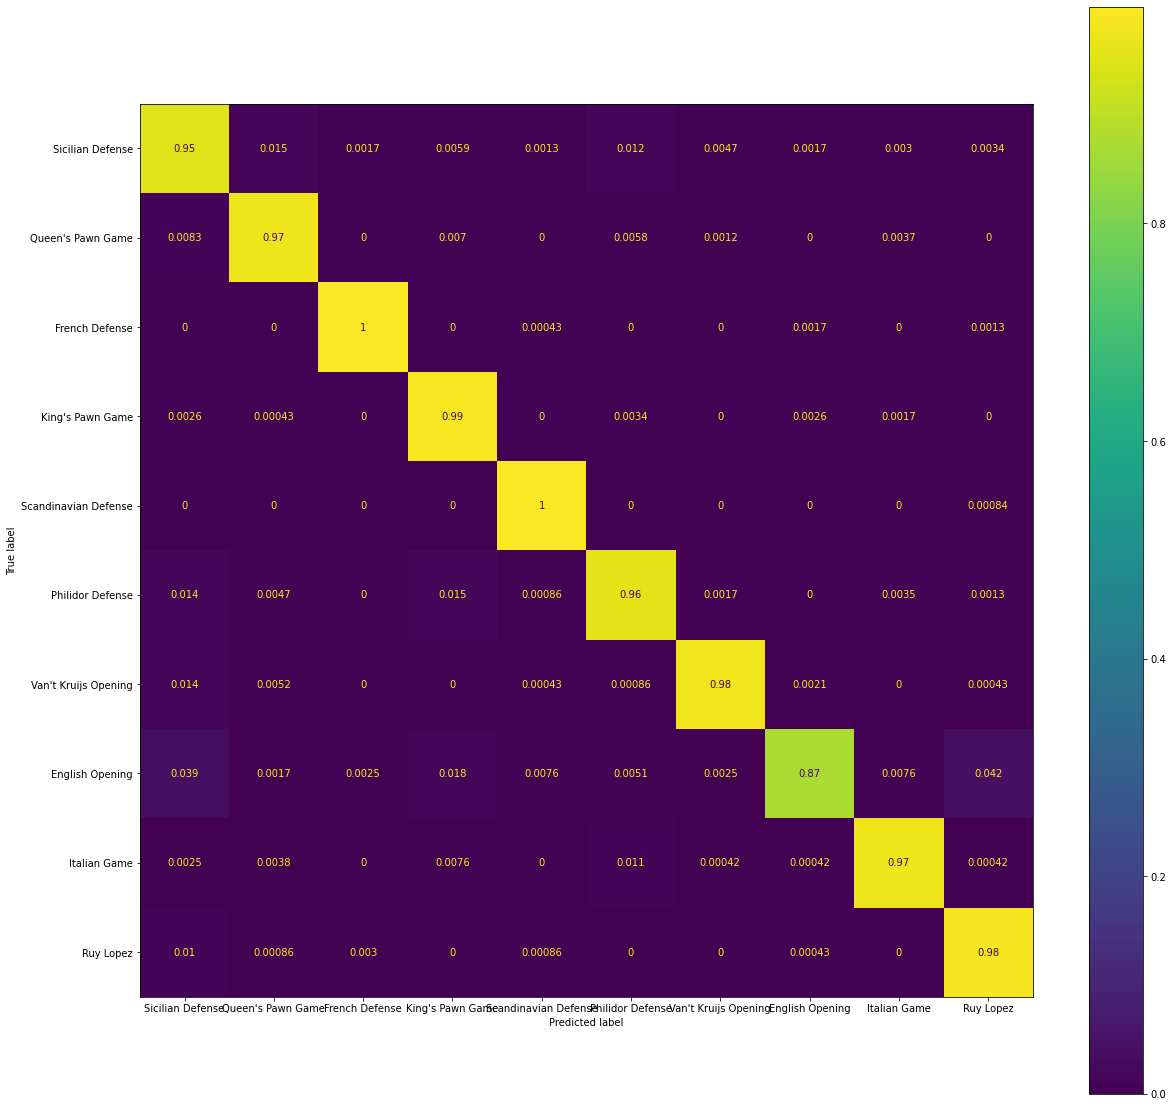

In [ ]:
import matplotlib.pyplot as plt

# Plotting confusion matrix
cm = confusion_matrix(opening_labels_test,Yhat_test,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax = ax)

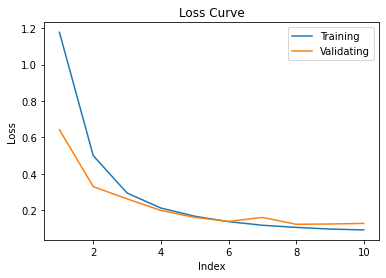

In [ ]:
plt.plot(loss_index, train_losslist,loss_index, valid_losslist)
plt.xlabel("Index")
plt.ylabel("Loss")
plt.legend(["Training","Validating"])
plt.title("Loss Curve")
plt.show()